<a href="https://colab.research.google.com/github/anavianascientist/Deep_Learning/blob/master/Tensorflow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Deep Learning

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

11493376/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, '0')

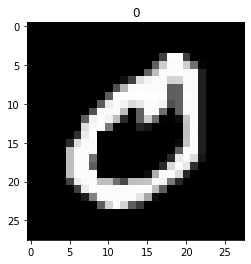

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [6]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4357 - accuracy: 0.8691 - val_loss: 0.1709 - val_accuracy: 0.9479
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2210 - accuracy: 0.9361 - val_loss: 0.1244 - val_accuracy: 0.9638
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1857 - accuracy: 0.9468 - val_loss: 0.1175 - val_accuracy: 0.9640
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1604 - accuracy: 0.9529 - val_loss: 0.1030 - val_accuracy: 0.9691
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1437 - accuracy: 0.9583 - val_loss: 0.0946 - val_accuracy: 0.9725
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1347 - accuracy: 0.9605 - val_loss: 0.0963 - val_accuracy: 0.9718
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1289 - accuracy: 0.9627 - val_loss: 0.0909 - val_accuracy:

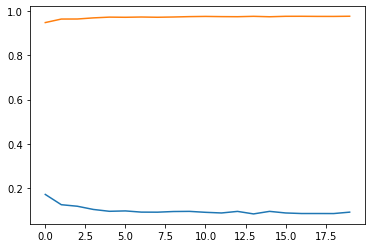

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [11]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

array([[5.1290122e-14, 2.6967506e-09, 1.0753057e-06, ..., 9.9999809e-01,
        7.0335897e-11, 5.3725405e-08],
       [1.8434304e-12, 6.2211757e-06, 9.9999332e-01, ..., 1.8927888e-07,
        1.3821854e-07, 4.4231632e-16],
       [6.9887922e-15, 9.9999845e-01, 1.1227596e-08, ..., 3.4940021e-07,
        6.3020644e-07, 7.5849504e-10],
       ...,
       [9.5796589e-16, 2.3606405e-12, 1.5975599e-09, ..., 1.4654162e-09,
        2.5213397e-11, 1.1047348e-06],
       [1.1571371e-18, 8.1880478e-17, 1.6043646e-17, ..., 7.1135696e-18,
        3.5575622e-11, 2.2730907e-11],
       [1.6232532e-15, 1.4897045e-17, 4.5254609e-16, ..., 7.3385426e-17,
        2.4346828e-11, 1.5041844e-19]], dtype=float32)

In [12]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    1,    2,    1,    0,    0,    2,    1,    2,    0],
       [   0, 1124,    1,    2,    0,    2,    2,    0,    4,    0],
       [   2,    0, 1002,   10,    1,    0,    2,    6,    9,    0],
       [   0,    0,    4,  980,    0,   12,    0,    4,    5,    5],
       [   1,    0,    3,    0,  955,    0,   10,    0,    2,   11],
       [   3,    1,    0,    7,    1,  869,    6,    1,    3,    1],
       [   3,    2,    0,    0,    2,    5,  942,    0,    4,    0],
       [   0,    6,    8,    4,    2,    0,    0,  996,    0,   12],
       [   4,    2,    1,    6,    3,    4,    2,    3,  946,    3],
       [   4,    5,    0,    5,    6,    5,    0,    2,    2,  980]])

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]